In [83]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import os
import scipy
import yaml
import random

In [84]:
radius = (np.arange(300, 910, 10, dtype=np.float32)/12)/2
radius

array([12.5     , 12.916667, 13.333333, 13.75    , 14.166667, 14.583333,
       15.      , 15.416667, 15.833333, 16.25    , 16.666666, 17.083334,
       17.5     , 17.916666, 18.333334, 18.75    , 19.166666, 19.583334,
       20.      , 20.416666, 20.833334, 21.25    , 21.666666, 22.083334,
       22.5     , 22.916666, 23.333334, 23.75    , 24.166666, 24.583334,
       25.      , 25.416666, 25.833334, 26.25    , 26.666666, 27.083334,
       27.5     , 27.916666, 28.333334, 28.75    , 29.166666, 29.583334,
       30.      , 30.416666, 30.833334, 31.25    , 31.666666, 32.083332,
       32.5     , 32.916668, 33.333332, 33.75    , 34.166668, 34.583332,
       35.      , 35.416668, 35.833332, 36.25    , 36.666668, 37.083332,
       37.5     ], dtype=float32)

In [85]:
len((np.arange(300, 910, 10, dtype=np.int32))) == len(np.round((np.arange(300, 910, 10, dtype=np.int32)/12), 0))

True

In [99]:
diameters = np.arange(int(25//2), int(76//2), 1, dtype=np.int32)
diameters

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37], dtype=int32)

In [96]:
diameters = np.round((np.arange(300, 910, 10, dtype=np.int32)/12), 0).astype(np.int32)

borders = np.arange(1, 11, 1)
print(diameters, borders)

[25 26 27 28 28 29 30 31 32 32 33 34 35 36 37 38 38 39 40 41 42 42 43 44
 45 46 47 48 48 49 50 51 52 52 53 54 55 56 57 58 58 59 60 61 62 62 63 64
 65 66 67 68 68 69 70 71 72 72 73 74 75] [ 1  2  3  4  5  6  7  8  9 10]


In [87]:
img = np.zeros((768, 1024), dtype=np.float32)

In [94]:
image_height =768
image_width = 1024
min_pad = 30
min_gap = 50    
photos = []
line = []
photos_centers = []
photo_centers = []

line_centers = []
centers = []
photo = []
available_width = image_width - 2 * min_gap
available_height = image_height - 2 * min_gap
center_w = 0 + min_gap
center_h = 0 + min_gap

for i in range(len(diameters)):
    if available_height >= (diameters[i] + 2*min_gap):
        if available_width >= (diameters[i] + min_gap):
            print('current diam appended ', diameters[i])
            line.append(diameters[i])
            # определяем центр
            center_w = center_w + min_gap + diameters[i]//2
            center_h = max(center_h + diameters[i]//2, center_h)
            line_centers.append([center_w, center_h])
            available_width = available_width - diameters[i] - min_gap
        else:
            print('appended in photo line ', line)
            photo.append(line)
            line_centers = np.array(line_centers)
            line_centers[:,1] = np.max(line_centers[:,1])
            line_centers = list(line_centers)
            photo_centers.append(line_centers)
            print(line_centers, line_centers)
            available_height = available_height - np.max(line) - min_gap
            available_width = image_width - min_gap

            # center_w = line_centers[0][0] + np.max(line)//2 + 2*min_gap
            # center_h = line_centers[0][1] + np.max(line)//2 + 2*min_gap
            line = []
            # line_centers = []
        if i == (len(diameters) -1):
            photo.append(line)
            photo_centers.append(line_centers)
            photos.append(photo)
            photos_centers.append(photo_centers)

            photo = []
            photo_centers = []

    else:
        print('extra line ', line)
        photos.append(photo)
        photos_centers.append(photo_centers)
        photo_centers = []
        line_centers = []
        photo = []
        line = []
        available_width = image_width - 2 * min_gap
        available_height = image_height - 2 * min_gap

        center_w = 0 + min_gap
        center_h = 0 + min_gap

# for 
# for 

# for i in range 

# print(photo)
        # 

current diam appended  25
current diam appended  26
current diam appended  27
current diam appended  28
current diam appended  28
current diam appended  29
current diam appended  30
current diam appended  31
current diam appended  32
current diam appended  32
current diam appended  33
appended in photo line  [25, 26, 27, 28, 28, 29, 30, 31, 32, 32, 33]
[array([112, 208]), array([175, 208]), array([238, 208]), array([302, 208]), array([366, 208]), array([430, 208]), array([495, 208]), array([560, 208]), array([626, 208]), array([692, 208]), array([758, 208])] [array([112, 208]), array([175, 208]), array([238, 208]), array([302, 208]), array([366, 208]), array([430, 208]), array([495, 208]), array([560, 208]), array([626, 208]), array([692, 208]), array([758, 208])]
current diam appended  35
current diam appended  36
current diam appended  37
current diam appended  38
current diam appended  38
current diam appended  39
current diam appended  40
current diam appended  41
current diam appe

In [95]:
photos

[[[25, 26, 27, 28, 28, 29, 30, 31, 32, 32, 33],
  [35, 36, 37, 38, 38, 39, 40, 41, 42, 42],
  [44, 45, 46, 47, 48, 48, 49, 50, 51],
  [52, 53, 54, 55, 56, 57, 58, 58, 59],
  [61, 62, 62, 63, 64, 65, 66, 67]],
 [[69, 70, 71, 72, 72, 73, 74], []]]

[25, 26, 27, 28, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 37] [array([ 72, 258]), array([115, 258]), array([158, 258]), array([202, 258]), array([246, 258]), array([290, 258]), array([335, 258]), array([380, 258]), array([426, 258]), array([472, 258]), array([518, 258]), array([565, 258]), array([612, 258]), array([660, 258]), array([708, 258])]
25
26
27
28
28
29
30
31
32
32
33
34
35
36
37
[38, 39, 40, 41, 42, 42, 43, 44, 45, 46, 47, 48, 48] [array([199, 615]), array([248, 615]), array([298, 615]), array([348, 615]), array([399, 615]), array([450, 615]), array([501, 615]), array([553, 615]), array([605, 615]), array([658, 615]), array([711, 615]), array([765, 615]), array([819, 615])]
38
39
40
41
42
42
43
44
45
46
47
48
48
[50, 51, 52, 52, 53, 54, 55, 56, 57, 58, 58] [array([338, 995]), array([393, 995]), array([449, 995]), array([505, 995]), array([561, 995]), array([618, 995]), array([675, 995]), array([733, 995]), array([791, 995]), array([850, 995]), array([909, 995])]
50
51
52
52
5

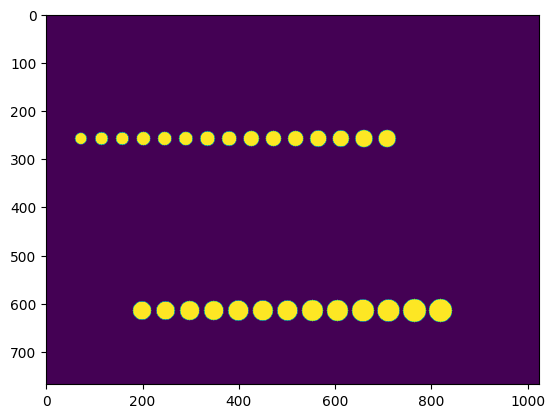

In [89]:

image = np.zeros((768, 1024), dtype=np.uint8)
for photo, photo_centers in zip(photos, photos_centers):
    for line, line_centers in zip(photo, photo_centers):
        print(line, line_centers)
        for diam, center in zip(line, line_centers):
            print(diam)
            cv2.circle(image, center, diam//2, 255, -1)
    
    break

plt.imshow(image)

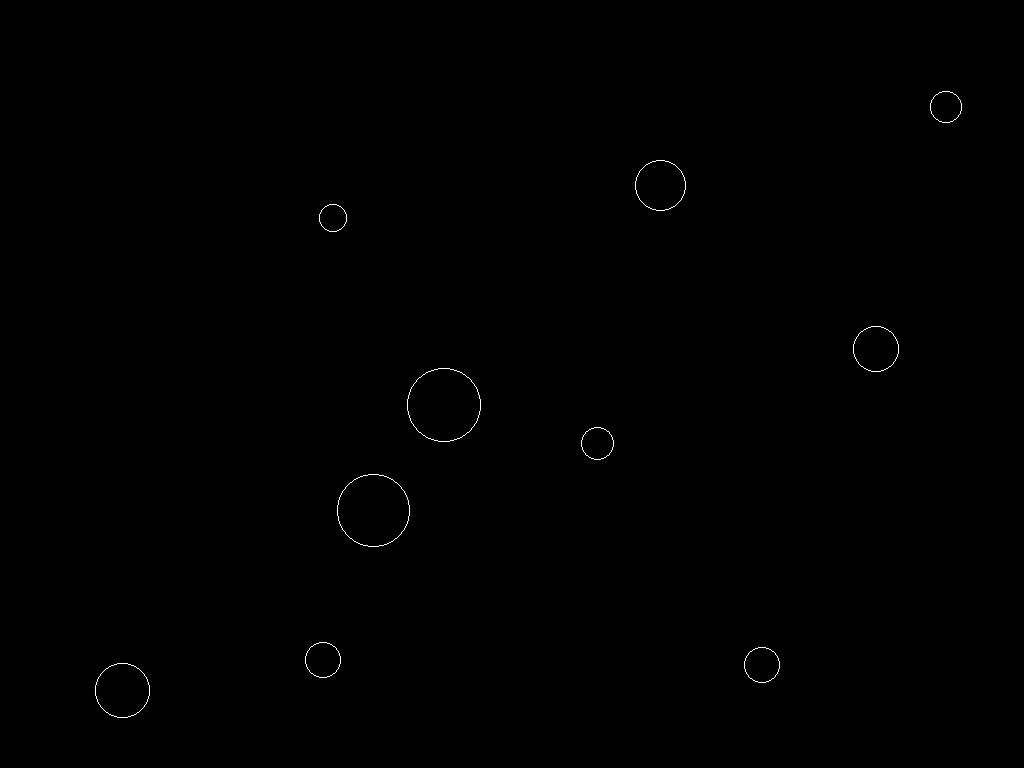

In [101]:
from PIL import Image, ImageDraw
import random

def create_image(num_circles, min_diameter, max_diameter, min_distance):
    image_width = 1024  # Ширина изображения
    image_height = 768  # Высота изображения
    padding = 50  # Отступ от краев изображения
    
    image = Image.new("RGB", (image_width, image_height), "black")
    draw = ImageDraw.Draw(image)
    circles = []
    
    for _ in range(num_circles):
        diameter = random.randint(min_diameter, max_diameter)
        x = random.randint(padding, image_width - diameter - padding)
        y = random.randint(padding, image_height - diameter - padding)
        circle = (x, y, x + diameter, y + diameter)
        circles.append(circle)
    
    for i, circle in enumerate(circles):
        for other_circle in circles[i + 1:]:
            if (
                circle[2] + min_distance > other_circle[0]
                and circle[0] - min_distance < other_circle[2]
                and circle[3] + min_distance > other_circle[1]
                and circle[1] - min_distance < other_circle[3]
            ):
                return create_image(num_circles, min_diameter, max_diameter, min_distance)
    
    for circle in circles:
        draw.ellipse(circle, outline="white")
    
    return image

num_circles = 10
min_diameter = 25
max_diameter = 75
min_distance = 30

result_image = create_image(num_circles, min_diameter, max_diameter, min_distance)
result_image.show()
result_image.save("circles_image.png")


In [103]:
image = np.zeros((768, 1024), dtype=np.uint8)


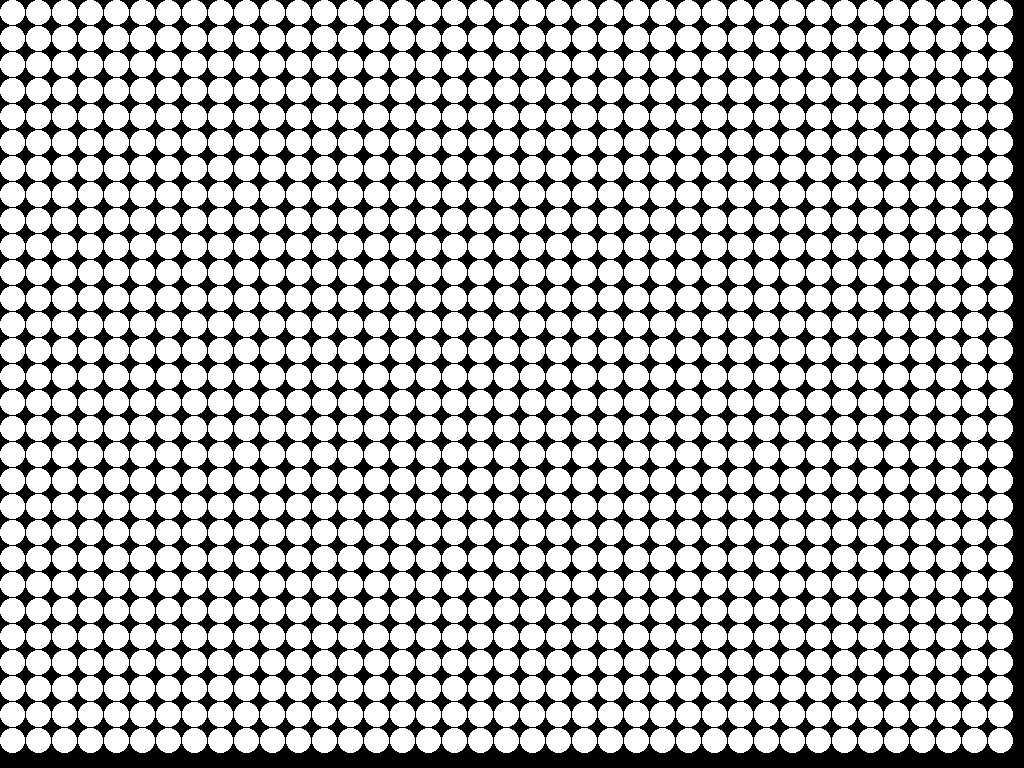

In [102]:
from PIL import Image, ImageDraw

def create_image(image_width, image_height, circle_diameter):
    image = Image.new("RGB", (image_width, image_height), "black")  # Черный фон
    draw = ImageDraw.Draw(image)
    
    x_start = circle_diameter // 2
    y_start = circle_diameter // 2
    x_end = image_width - circle_diameter // 2
    y_end = image_height - circle_diameter // 2
    step = circle_diameter + 1  # Шаг между кругами
    
    x, y = x_start, y_start
    
    while y <= y_end:
        while x <= x_end:
            circle = (x - circle_diameter // 2, y - circle_diameter // 2,
                      x + circle_diameter // 2, y + circle_diameter // 2)
            draw.ellipse(circle, outline="white", fill="white")
            x += step
        y += step
        x = x_start  # Возвращаемся в начало для новой строки
    
    return image

image_width = 1024
image_height = 768
circle_diameter = 25

result_image = create_image(image_width, image_height, circle_diameter)
result_image.show()
result_image.save("circles_image_lines.png")


In [68]:
photos_centers

[[[array([145, 112]),
   array([145, 175]),
   array([145, 238]),
   array([145, 302]),
   array([145, 366]),
   array([145, 430]),
   array([145, 495])],
  [array([378, 293]),
   array([378, 359]),
   array([378, 425]),
   array([378, 492]),
   array([378, 559]),
   array([378, 627]),
   array([378, 695])],
  [array([616, 480]),
   array([616, 549]),
   array([616, 619]),
   array([616, 689]),
   array([616, 760]),
   array([616, 831])],
  [array([875, 673]),
   array([875, 745]),
   array([875, 818]),
   array([875, 891]),
   array([875, 965]),
   array([ 875, 1039])]],
 [[array([207, 125]),
   array([207, 201]),
   array([207, 277]),
   array([207, 353]),
   array([207, 430]),
   array([207, 507])],
  [array([509, 330]),
   array([509, 409]),
   array([509, 488]),
   array([509, 567]),
   array([509, 647]),
   array([509, 727])],
  [array([798, 541]),
   array([798, 622]),
   array([798, 704]),
   array([798, 786]),
   array([798, 869])],
  [array([1103,  758]),
   array([1103,  842

In [54]:
np.array([32, 45, 67])

array([32, 45, 67])

In [55]:
list(np.array([32, 45, 67]))

[32, 45, 67]

In [49]:
line_centers

[(112, 112),
 (175, 175),
 (238, 238),
 (302, 302),
 (366, 366),
 (430, 430),
 (495, 495),
 (561, 561),
 (627, 627),
 (693, 693),
 (760, 760),
 (827, 827),
 (895, 895),
 (963, 963),
 (1032, 1032),
 (1101, 1101),
 (1171, 1171),
 (1241, 1241),
 (1312, 1312),
 (1383, 1383),
 (1455, 1455),
 (1527, 1527),
 (1600, 1600),
 (1673, 1673),
 (1747, 1747),
 (1821, 1821),
 (1896, 1896),
 (1972, 1972),
 (2048, 2048),
 (2124, 2124),
 (2201, 2201),
 (2278, 2278),
 (2356, 2356),
 (2435, 2435),
 (2514, 2514),
 (2593, 2593),
 (2673, 2673),
 (2753, 2753),
 (2834, 2834),
 (2915, 2915),
 (2997, 2997),
 (3079, 3079),
 (3162, 3162),
 (3246, 3246),
 (3330, 3330),
 (3414, 3414),
 (3499, 3499),
 (3584, 3584),
 (3670, 3670),
 (3757, 3757),
 (3844, 3844)]

In [46]:
photos

[[[25, 26, 27, 28, 28, 29, 30],
  [32, 32, 33, 34, 35, 36, 37],
  [38, 39, 40, 41, 42, 42],
  [44, 45, 46, 47, 48, 48]],
 [[51, 52, 52, 53, 54, 55],
  [57, 58, 58, 59, 60, 61],
  [62, 63, 64, 65, 66],
  [68, 68, 69, 70, 71]],
 [[73, 74, 75]]]

In [27]:

# def place_circles(image_height, image_width, min_pad = 30, min_gap = 50):
image_height =768
image_width = 1024
min_pad = 30
min_gap = 50    
photos = []
line = []
centers = []
photo = []
available_width = image_width - 2 * min_gap
available_height = image_height - 2 * min_gap

for i in range(len(diameters)):
    # print(diameters[i])
    # if available_width < (diameters[i] + min_gap):
    #     # print(line)
    #     # photo.append(line)
    #     # # line = []
    #     # available_width = image_width - 2 * min_pad
    #     break
    if available_width >= (diameters[i] + min_gap):
        line.append(diameters[i])
        available_width = available_width - diameters[i] - 2*min_gap
    else:
        print(line)
        photo.append(line)
        available_height = available_height - np.max(line) - 2*min_gap
        available_width = image_width - 2 * min_gap
        line = []
    
# line

[25, 26, 27, 28, 28, 29, 30]
[32, 32, 33, 34, 35, 36, 37]
[38, 39, 40, 41, 42, 42]
[44, 45, 46, 47, 48, 48]
[50, 51, 52, 52, 53, 54]
[56, 57, 58, 58, 59, 60]
[62, 62, 63, 64, 65]
[67, 68, 68, 69, 70]


In [15]:
def place_circles_on_image(image_width, image_height, min_distance=50, min_margin=30, min_diameter=25, max_diameter=75):
    # Рассчитываем доступное пространство для размещения кругов с учетом отступов
    available_width = image_width - 2 * min_margin
    available_height = image_height - 2 * min_margin
    
    # Инициализация пустого массива для хранения диаметров кругов на каждой линии
    circle_lines = []
    
    # Находим максимальное количество кругов по горизонтали
    for diameter in range(max_diameter, min_diameter - 1, -1):
        circle_with_spacing = diameter + min_distance
        if circle_with_spacing <= available_width:
            circles_horizontal = available_width // circle_with_spacing
            break
    
    # Находим максимальное количество кругов по вертикали
    for diameter in range(max_diameter, min_diameter - 1, -1):
        circle_with_spacing = diameter + min_distance
        if circle_with_spacing <= available_height:
            circles_vertical = available_height // circle_with_spacing
            break
    
    # Рассчитываем диаметр кругов и заполняем массив
    diameter = min((available_width // circles_horizontal) - min_distance, (available_height // circles_vertical) - min_distance)
    
    for _ in range(circles_vertical):
        line = [diameter] * circles_horizontal
        circle_lines.append(line)
    
    return circle_lines

# Пример использования функции для изображения 768x1024
image_width = 1024
image_height = 768
circle_array = place_circles_on_image(image_width, image_height)

for line in circle_array:
    print(line)

[87, 87, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87]


In [84]:
photo = []
line = []
centers = []
left_space = img.shape[1] -5
left_space_ = img.shape[0] - 5
for i in range(len(diameters)-1):
    if left_space_ < (diameters[i] + 30):
        break
    # print(diameters[i])
    left_space = left_space - diameters[i] - 2*30
    # left_space_ = left_space_ - diameters[i] - 2*15

    if left_space > (diameters[i+1] + 2*30):
        # print(diameters[i])
        line.append(diameters[i])
        # centers.append()
    else:
        photo.append(line)
        left_space_ = left_space_ - np.max(line) - 2*30
        line = []
        left_space = img.shape[1]
        # left_space_ = img.shape[0]
        

# line.append()
photo.append(line)
line = []
line.append(diameters[-1])
photo.append(line)


In [79]:
photo[0]

[25, 26, 27, 28, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 37]

25 (42, 31)
26 (68, 31)
27 (94, 31)
28 (122, 31)
28 (150, 31)
29 (178, 31)
30 (208, 31)
31 (238, 31)
32 (270, 31)
32 (302, 31)


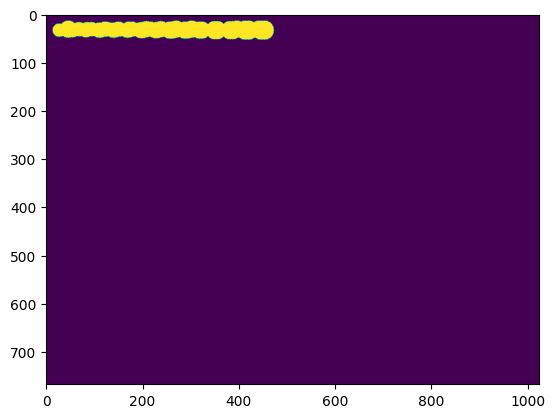

In [87]:
# center = (0 + 15 + )
center = (0, 0 + 15 + np.max(photo[0])//2)

for diam in photo[0]:
    # cv2.circle()
    # center = (0 + 15 + diam//2, 0 + 15 + np.max(photo[0])//2)
    print(diam, (center[0] + 30 + diam//2, center[1]))

    cv2.circle(img, (center[0] + 30 + diam//2, center[1]), diam//2 + 2, 128, -1)
    center = (center[0] + diam, center[1])
    # break

plt.imshow(img)

In [71]:
np.sum(photo[0]) + 2*15 * len(photo[0])

913

In [72]:
photo

[[25, 26, 27, 28, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 37],
 [38, 39, 40, 41, 42, 42, 43, 44, 45, 46, 47, 48],
 [49, 50, 51, 52, 52, 53, 54, 55, 56, 57, 58],
 [59, 60, 61, 62, 62, 63, 64, 65, 66],
 [68, 68, 69, 70, 71, 72, 72, 73, 74],
 [75]]

In [55]:
img = np.zeros((768, 1024), dtype=np.float32)
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)